In [1]:
from core.tops.config.lazy import LazyConfig
from core.tops.config.instantiate import instantiate
from tools import analytics

In [2]:
cfg = LazyConfig.load("core/configs/task24/retina_P1_6.py")
anchors = instantiate(cfg.anchors)

In [3]:
FEATURE_MAP_SIZES = ["32x256", "16x128", "8x64", "4x32", "2x16", "1x8"]

In [ ]:
for fkey in FEATURE_MAP_SIZES:
    analytics.vizualize_anchors(anchors.feature_map_boxes, show_key=fkey)

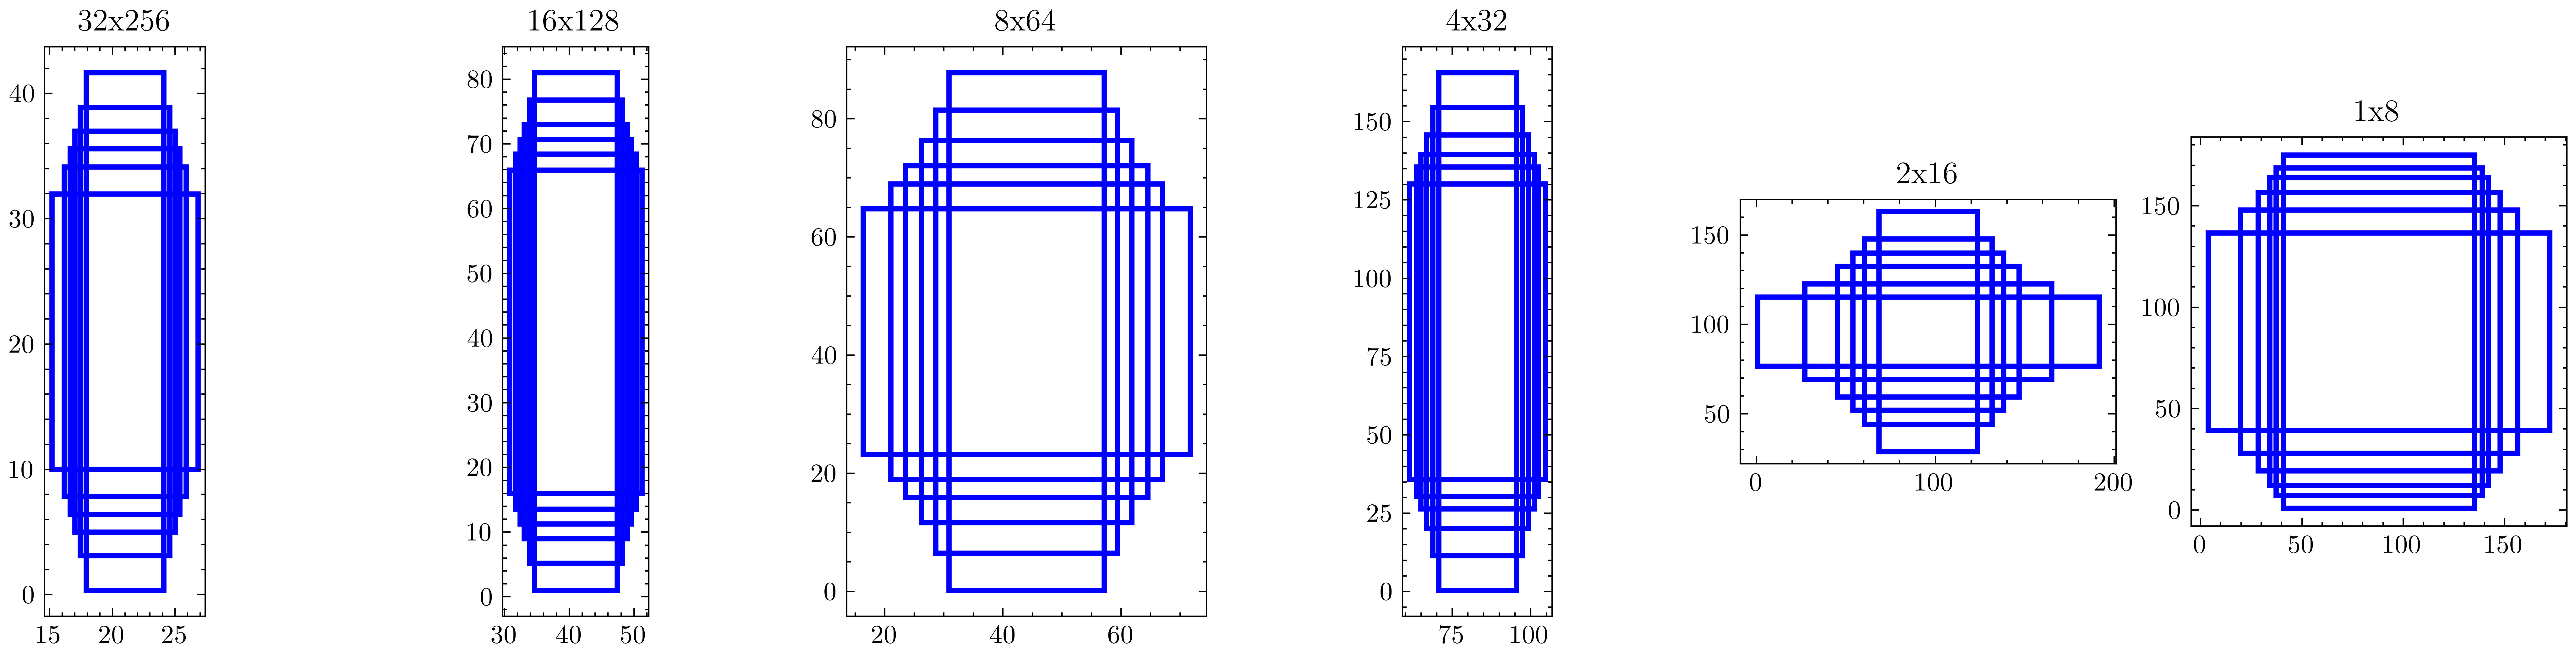

In [7]:
viz_cfg = {"figsize": (18, 4), "dpi": 600}
analytics.vizualize_anchors_clustered(anchors.feature_map_boxes, FEATURE_MAP_SIZES, viz_cfg)